In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
from netCDF4 import Dataset, date2index, num2date, date2num

In [217]:
past = "F:/CMIP6_Data/Data/Merged/tasmax_day_ACCESS-CM2_historical_r1i1p1f1_gn_1950101-20141231.nc"
future = ["F:/CMIP6_Data/Data/tasmax_day_ACCESS-CM2_ssp126_r1i1p1f1_gn_20150101-20641231.nc", "F:/CMIP6_Data/Data/tasmax_day_ACCESS-CM2_ssp126_r1i1p1f1_gn_20650101-21001231.nc", "F:/CMIP6_Data/Data/tasmax_day_ACCESS-CM2_ssp245_r1i1p1f1_gn_20150101-20641231.nc",
         "F:/CMIP6_Data/Data/tasmax_day_ACCESS-CM2_ssp245_r1i1p1f1_gn_20650101-21001231.nc", "F:/CMIP6_Data/Data/tasmax_day_ACCESS-CM2_ssp370_r1i1p1f1_gn_20150101-20641231.nc", "F:/CMIP6_Data/Data/tasmax_day_ACCESS-CM2_ssp370_r1i1p1f1_gn_20650101-21001231.nc",
         "F:/CMIP6_Data/Data/tasmax_day_ACCESS-CM2_ssp585_r1i1p1f1_gn_20150101-20641231.nc", "F:/CMIP6_Data/Data/tasmax_day_ACCESS-CM2_ssp585_r1i1p1f1_gn_20650101-21001231.nc"]

In [218]:
nc = Dataset(past)

In [219]:
nc.dimensions

{'time': <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 23741,
 'bnds': <class 'netCDF4._netCDF4.Dimension'>: name = 'bnds', size = 2,
 'lon': <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 192,
 'lat': <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 144}

In [221]:
nc.variables

{'time': <class 'netCDF4._netCDF4.Variable'>
 float64 time(time)
     standard_name: time
     long_name: time
     bounds: time_bnds
     units: days since 1850-01-01
     calendar: proleptic_gregorian
     axis: T
 unlimited dimensions: time
 current shape = (23741,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'time_bnds': <class 'netCDF4._netCDF4.Variable'>
 float64 time_bnds(time, bnds)
 unlimited dimensions: time
 current shape = (23741, 2)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lon': <class 'netCDF4._netCDF4.Variable'>
 float64 lon(lon)
     standard_name: longitude
     long_name: Longitude
     units: degrees_east
     axis: X
     bounds: lon_bnds
 unlimited dimensions: 
 current shape = (192,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lon_bnds': <class 'netCDF4._netCDF4.Variable'>
 float64 lon_bnds(lon, bnds)
 unlimited dimensions: 
 current shape = (192, 2)
 filling on, default _FillValue of 9.9692099683868

In [222]:
nc.variables['time']

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    long_name: time
    bounds: time_bnds
    units: days since 1850-01-01
    calendar: proleptic_gregorian
    axis: T
unlimited dimensions: time
current shape = (23741,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [223]:
nc_time = nc.variables['time']
nc_time[0:10]

masked_array(data=[36524.5, 36525.5, 36526.5, 36527.5, 36528.5, 36529.5,
                   36530.5, 36531.5, 36532.5, 36533.5],
             mask=False,
       fill_value=1e+20)

In [224]:
time_start = date2index(dt.datetime(1970, 1, 1), nc_time, select="nearest")
time_end = date2index(dt.datetime(2000, 12, 31), nc_time, select="nearest")

In [225]:
num2date(nc_time[time_end], units=nc_time.units, calendar=nc_time.calendar)

cftime.DatetimeProlepticGregorian(2000, 12, 30, 12, 0, 0, 0, has_year_zero=True)

In [227]:
#Bhur station coords
target = {"lat": 26.9, "lon": 90.43}

In [192]:
nc_lat = nc.variables['lat'][:].data
nc_lon = nc.variables['lon'][:].data

In [228]:
lat_cell = np.argmin(np.abs(nc_lat - target['lat']))
lon_cell = np.argmin(np.abs(nc_lon - target['lon']))

In [229]:
dat = nc.variables['tasmax'][time_start:(time_end + 1), lat_cell, lon_cell]
dat[0:10]

masked_array(data=[281.46704, 282.52734, 282.80176, 282.66455, 280.49463,
                   281.5891 , 281.35132, 284.94458, 285.22876, 283.761  ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [230]:
dat = np.subtract(dat.data, 273.15) #Convert from Kelvin to Celsius

In [231]:
time_end - time_start + 1

11323

In [232]:
len(dat)

11323

In [233]:
dates = num2date(nc_time[time_start:time_end + 1], units=nc_time.units, calendar=nc_time.calendar)

In [234]:
df = pd.DataFrame({'Date': dates, 'MaxTemp': dat, 'Experiment': 'historical'})
df.head()

,Date,MaxTemp,Experiment
0,1969-12-31 12:00:00,8.317047,historical
1,1970-01-01 12:00:00,9.377350,historical
2,1970-01-02 12:00:00,9.651764,historical
3,1970-01-03 12:00:00,9.514557,historical
4,1970-01-04 12:00:00,7.344635,historical


In [235]:
df['Date'] = [dt.date(i.year, i.month, i.day) for i in df.Date]

In [236]:
df.head()

,Date,MaxTemp,Experiment
0,1969-12-31,8.317047,historical
1,1970-01-01,9.377350,historical
2,1970-01-02,9.651764,historical
3,1970-01-03,9.514557,historical
4,1970-01-04,7.344635,historical


In [237]:
df.tail()

,Date,MaxTemp,Experiment
11318,2000-12-26,9.005768,historical
11319,2000-12-27,10.194733,historical
11320,2000-12-28,9.781647,historical
11321,2000-12-29,9.636139,historical
11322,2000-12-30,10.643707,historical


Text(0, 0.5, 'Daily Maximum Temperature (°C)')

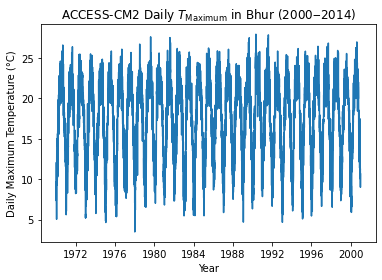

In [238]:
plt.plot(df.Date, df.MaxTemp)
plt.title(r'ACCESS-CM2 Daily $T_\mathrm{Maximum}$ in Bhur (2000‒2014)')
plt.xlabel("Year")
plt.ylabel("Daily Maximum Temperature (°C)")

In [239]:
nc.close()

In [240]:
future

['F:/CMIP6_Data/Data/tasmax_day_ACCESS-CM2_ssp126_r1i1p1f1_gn_20150101-20641231.nc',
 'F:/CMIP6_Data/Data/tasmax_day_ACCESS-CM2_ssp126_r1i1p1f1_gn_20650101-21001231.nc',
 'F:/CMIP6_Data/Data/tasmax_day_ACCESS-CM2_ssp245_r1i1p1f1_gn_20150101-20641231.nc',
 'F:/CMIP6_Data/Data/tasmax_day_ACCESS-CM2_ssp245_r1i1p1f1_gn_20650101-21001231.nc',
 'F:/CMIP6_Data/Data/tasmax_day_ACCESS-CM2_ssp370_r1i1p1f1_gn_20150101-20641231.nc',
 'F:/CMIP6_Data/Data/tasmax_day_ACCESS-CM2_ssp370_r1i1p1f1_gn_20650101-21001231.nc',
 'F:/CMIP6_Data/Data/tasmax_day_ACCESS-CM2_ssp585_r1i1p1f1_gn_20150101-20641231.nc',
 'F:/CMIP6_Data/Data/tasmax_day_ACCESS-CM2_ssp585_r1i1p1f1_gn_20650101-21001231.nc']

In [242]:
for file in future:
    nc = Dataset(file)
    nc_time = nc.variables["time"]
    time_start = date2index(dt.datetime(2010, 1, 1), nc_time, select="nearest")
    time_end = date2index(dt.datetime(2099, 12, 31), nc_time, select="nearest")
    lat_cell = np.argmin(np.abs(nc_lat - target['lat']))
    lon_cell = np.argmin(np.abs(nc_lon - target['lon']))
    dat = nc.variables['tasmax'][time_start:(time_end + 1), lat_cell, lon_cell]
    dat = np.subtract(dat.data, 273.15)
    dates = num2date(nc_time[time_start:time_end + 1], units=nc_time.units, calendar=nc_time.calendar)
    df2 = pd.DataFrame({'Date': dates, 'MaxTemp': dat, 'Experiment': re.findall(r'ssp[012345678]{3}', file)[0]})
    df2['Date'] = [dt.date(i.year, i.month, i.day) for i in df2.Date]
    df = df.append(df2, ignore_index=True, sort=True)
    nc.close()

In [243]:
df.head

<bound method NDFrame.head of               Date  Experiment    MaxTemp
0       1969-12-31  historical   8.317047
1       1970-01-01  historical   9.377350
2       1970-01-02  historical   9.651764
3       1970-01-03  historical   9.514557
4       1970-01-04  historical   7.344635
...            ...         ...        ...
261142  2099-12-27      ssp585  18.048737
261143  2099-12-28      ssp585  17.401520
261144  2099-12-29      ssp585  15.163727
261145  2099-12-30      ssp585  15.474518
261146  2099-12-31      ssp585  14.898102

[261147 rows x 3 columns]>

<AxesSubplot:>

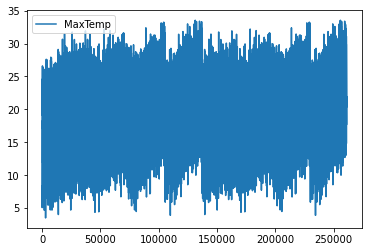

In [244]:
df.plot()

Text(0, 0.5, 'Daily Maximum Temperature (°C)')

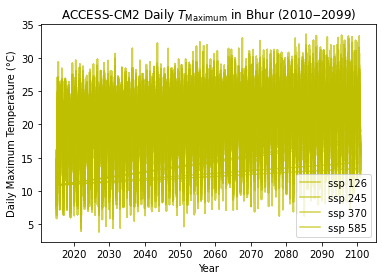

In [245]:
plt.plot(df.Date[df.Experiment == "ssp126"], df.MaxTemp[df.Experiment == "ssp126"], 'y-', alpha=0.7, label = 'ssp 126')
plt.plot(df.Date[df.Experiment == "ssp245"], df.MaxTemp[df.Experiment == "ssp245"], 'y-', alpha=0.7, label = 'ssp 245')
plt.plot(df.Date[df.Experiment == "ssp370"], df.MaxTemp[df.Experiment == "ssp370"], 'y-', alpha=0.7, label = 'ssp 370')
plt.plot(df.Date[df.Experiment == "ssp585"], df.MaxTemp[df.Experiment == "ssp585"], 'y-', alpha=0.7, label = 'ssp 585')
plt.legend(loc='lower right')
plt.title(r'ACCESS-CM2 Daily $T_\mathrm{Maximum}$ in Bhur (2010‒2099)')
plt.xlabel("Year")
plt.ylabel("Daily Maximum Temperature (°C)")

KeyboardInterrupt: 

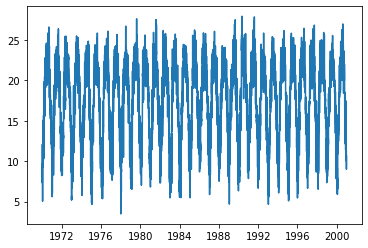

In [246]:
import seaborn as sns
sns.lineplot(data=df, x="Date", y="MaxTemp", hue="Experiment").set(ylabel="Maximum Temperature (°C)", title=r'ACCESS-CM2 Daily $T_\mathrm{Maximum}$ in Bhur (2000‒2100)')

In [247]:
df_wide = df.pivot(index='Date', columns='Experiment')['MaxTemp']
df_wide.head()

ValueError: Index contains duplicate entries, cannot reshape

In [248]:
df

,Date,Experiment,MaxTemp
0,1969-12-31,historical,8.317047
1,1970-01-01,historical,9.377350
2,1970-01-02,historical,9.651764
3,1970-01-03,historical,9.514557
4,1970-01-04,historical,7.344635
...,...,...,...
261142,2099-12-27,ssp585,18.048737
261143,2099-12-28,ssp585,17.401520
261144,2099-12-29,ssp585,15.163727
261145,2099-12-30,ssp585,15.474518


In [80]:
df_wide.tail()

Experiment,historical,ssp126,ssp245
Date,,,
2100-12-26,NaN,16.359039,16.023590
2100-12-27,NaN,13.847076,13.919830
2100-12-28,NaN,13.317535,18.381500
2100-12-29,NaN,14.486725,17.382721
2100-12-30,NaN,13.409821,14.300934


Text(0, 0.5, 'Maximum Temperature (°C)')

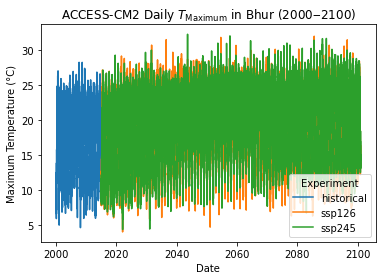

In [81]:
df_wide.plot(title = r'ACCESS-CM2 Daily $T_\mathrm{Maximum}$ in Bhur (2000‒2100)')
plt.ylabel("Maximum Temperature (°C)")

In [250]:
df_base = df[(df.Date >= dt.date(1970, 1, 1)) & (df.Date <= dt.date(2000, 12, 31))] #reference period
df_2020s = df[(df.Date >= dt.date(2010, 1, 1)) & (df.Date <= dt.date(2039, 12, 31))] #2020s
df_2030s = df[(df.Date >= dt.date(2020, 1, 1)) & (df.Date <= dt.date(2049, 12, 31))] #2030s
df_2040s = df[(df.Date >= dt.date(2030, 1, 1)) & (df.Date <= dt.date(2059, 12, 31))] #2040s
df_2050s = df[(df.Date >= dt.date(2040, 1, 1)) & (df.Date <= dt.date(2069, 12, 31))] #2050s
df_2060s = df[(df.Date >= dt.date(2050, 1, 1)) & (df.Date <= dt.date(2079, 12, 31))] #2060s
df_2070s = df[(df.Date >= dt.date(2060, 1, 1)) & (df.Date <= dt.date(2089, 12, 31))] #2070s
df_2080s = df[(df.Date >= dt.date(2070, 1, 1)) & (df.Date <= dt.date(2099, 12, 31))] #2080s

In [251]:
bsln126 = df_base[df_base.Experiment.isin(["historical", "ssp126"])].MaxTemp.mean()
bsln245 = df_base[df_base.Experiment.isin(["historical", "ssp245"])].MaxTemp.mean()
bsln370 = df_base[df_base.Experiment.isin(["historical", "ssp370"])].MaxTemp.mean()
bsln545 = df_base[df_base.Experiment.isin(["historical", "ssp545"])].MaxTemp.mean()
bsln = np.mean([bsln126, bsln245, bsln370, bsln545])

In [252]:
cf2020s_ssp126 = df_2020s[df_2020s.Experiment == "ssp126"].MaxTemp.mean() - bsln
cf2020s_ssp245 = df_2020s[df_2020s.Experiment == "ssp245"].MaxTemp.mean() - bsln
cf2020s_ssp370 = df_2020s[df_2020s.Experiment == "ssp370"].MaxTemp.mean() - bsln
cf2020s_ssp545 = df_2020s[df_2020s.Experiment == "ssp545"].MaxTemp.mean() - bsln
cf2030s_ssp126 = df_2030s[df_2030s.Experiment == "ssp126"].MaxTemp.mean() - bsln
cf2030s_ssp245 = df_2030s[df_2030s.Experiment == "ssp245"].MaxTemp.mean() - bsln
cf2030s_ssp370 = df_2030s[df_2030s.Experiment == "ssp370"].MaxTemp.mean() - bsln
cf2030s_ssp545 = df_2030s[df_2030s.Experiment == "ssp545"].MaxTemp.mean() - bsln
cf2040s_ssp126 = df_2040s[df_2040s.Experiment == "ssp126"].MaxTemp.mean() - bsln
cf2040s_ssp245 = df_2040s[df_2040s.Experiment == "ssp245"].MaxTemp.mean() - bsln
cf2040s_ssp370 = df_2040s[df_2040s.Experiment == "ssp370"].MaxTemp.mean() - bsln
cf2040s_ssp545 = df_2040s[df_2040s.Experiment == "ssp545"].MaxTemp.mean() - bsln
cf2050s_ssp126 = df_2050s[df_2050s.Experiment == "ssp126"].MaxTemp.mean() - bsln
cf2050s_ssp245 = df_2050s[df_2050s.Experiment == "ssp245"].MaxTemp.mean() - bsln
cf2050s_ssp370 = df_2050s[df_2050s.Experiment == "ssp370"].MaxTemp.mean() - bsln
cf2050s_ssp545 = df_2050s[df_2050s.Experiment == "ssp545"].MaxTemp.mean() - bsln
cf2060s_ssp126 = df_2060s[df_2060s.Experiment == "ssp126"].MaxTemp.mean() - bsln
cf2060s_ssp245 = df_2060s[df_2060s.Experiment == "ssp245"].MaxTemp.mean() - bsln
cf2060s_ssp370 = df_2060s[df_2060s.Experiment == "ssp370"].MaxTemp.mean() - bsln
cf2060s_ssp545 = df_2060s[df_2060s.Experiment == "ssp545"].MaxTemp.mean() - bsln
cf2070s_ssp126 = df_2070s[df_2070s.Experiment == "ssp126"].MaxTemp.mean() - bsln
cf2070s_ssp245 = df_2070s[df_2070s.Experiment == "ssp245"].MaxTemp.mean() - bsln
cf2070s_ssp370 = df_2070s[df_2070s.Experiment == "ssp370"].MaxTemp.mean() - bsln
cf2070s_ssp545 = df_2070s[df_2070s.Experiment == "ssp545"].MaxTemp.mean() - bsln
cf2080s_ssp126 = df_2080s[df_2080s.Experiment == "ssp126"].MaxTemp.mean() - bsln
cf2080s_ssp245 = df_2080s[df_2080s.Experiment == "ssp245"].MaxTemp.mean() - bsln
cf2080s_ssp370 = df_2080s[df_2080s.Experiment == "ssp370"].MaxTemp.mean() - bsln
cf2080s_ssp545 = df_2080s[df_2080s.Experiment == "ssp545"].MaxTemp.mean() - bsln

In [253]:
pd.DataFrame({"Model": np.repeat("ACCESS-CM2", 4),
              "Ensemble": np.repeat("r1i1p1", 4),
              "Scenario": ["ssp126", "ssp245", "ssp370", "ssp545"],
              "Baseline (°C)": np.repeat([bsln], 4),
              "2020s": [cf2020s_ssp126, cf2020s_ssp245, cf2020s_ssp370, cf2020s_ssp545],
              "2030s": [cf2030s_ssp126, cf2030s_ssp245, cf2030s_ssp370, cf2030s_ssp545],
              "2040s": [cf2040s_ssp126, cf2040s_ssp245, cf2040s_ssp370, cf2040s_ssp545],
              "2050s": [cf2050s_ssp126, cf2050s_ssp245, cf2050s_ssp370, cf2050s_ssp545],
              "2060s": [cf2060s_ssp126, cf2060s_ssp245, cf2060s_ssp370, cf2060s_ssp545],
              "2070s": [cf2070s_ssp126, cf2070s_ssp245, cf2070s_ssp370, cf2070s_ssp545],
              "2080s": [cf2080s_ssp126, cf2080s_ssp245, cf2080s_ssp370, cf2080s_ssp545]})

,Model,Ensemble,Scenario,Baseline (°C),2020s,2030s,2040s,2050s,2060s,2070s,2080s
0,ACCESS-CM2,r1i1p1,ssp126,17.766876,1.188120,1.486721,1.816484,2.099861,2.186138,2.245155,2.256041
1,ACCESS-CM2,r1i1p1,ssp245,17.766876,1.091707,1.408997,1.837358,2.272375,2.613728,2.901901,3.121983
2,ACCESS-CM2,r1i1p1,ssp370,17.766876,1.222782,1.548956,2.022907,2.461065,2.981953,3.512262,4.089325
3,ACCESS-CM2,r1i1p1,ssp545,17.766876,NaN,NaN,NaN,NaN,NaN,NaN,NaN
